## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools

from keras.layers import BatchNormalization
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

### BN Before Activation

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = keras.layers.ReLU()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = keras.layers.ReLU()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print('Experiment with Batch Size = {}'.format(bs))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-BatchSize={}".format(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Batch Size = 2
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_______________________________________

50000/50000 [==============================] - 179s 4ms/step - loss: 2.2615 - acc: 0.1437 - val_loss: 2.2183 - val_acc: 0.1806
Epoch 43/50
50000/50000 [==============================] - 178s 4ms/step - loss: 2.2652 - acc: 0.1466 - val_loss: 2.2419 - val_acc: 0.1401
Epoch 44/50
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2589 - acc: 0.1490 - val_loss: 2.2217 - val_acc: 0.1620
Epoch 45/50
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2575 - acc: 0.1463 - val_loss: 2.2218 - val_acc: 0.1405
Epoch 46/50
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2761 - acc: 0.1371 - val_loss: 2.2385 - val_acc: 0.1587
Epoch 47/50
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2608 - acc: 0.1479 - val_loss: 2.2273 - val_acc: 0.1749
Epoch 48/50
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2572 - acc: 0.1516 - val_loss: 2.2140 - val_acc: 0.1649
Epoch 49/50
50000/50000 [==============

50000/50000 [==============================] - 23s 462us/step - loss: 0.6021 - acc: 0.7885 - val_loss: 1.7516 - val_acc: 0.5066
Epoch 38/50
50000/50000 [==============================] - 23s 462us/step - loss: 0.5894 - acc: 0.7918 - val_loss: 1.8677 - val_acc: 0.4852
Epoch 39/50
50000/50000 [==============================] - 23s 463us/step - loss: 0.5911 - acc: 0.7899 - val_loss: 1.6584 - val_acc: 0.5232
Epoch 40/50
50000/50000 [==============================] - 23s 461us/step - loss: 0.5706 - acc: 0.7980 - val_loss: 1.6286 - val_acc: 0.5353
Epoch 41/50
50000/50000 [==============================] - 23s 463us/step - loss: 0.5589 - acc: 0.8020 - val_loss: 1.6948 - val_acc: 0.5184
Epoch 42/50
50000/50000 [==============================] - 23s 462us/step - loss: 0.5576 - acc: 0.8030 - val_loss: 1.7676 - val_acc: 0.5141
Epoch 43/50
50000/50000 [==============================] - 23s 463us/step - loss: 0.5459 - acc: 0.8074 - val_loss: 1.7363 - val_acc: 0.5243
Epoch 44/50
50000/50000 [=======

50000/50000 [==============================] - 12s 239us/step - loss: 0.3766 - acc: 0.8668 - val_loss: 2.1690 - val_acc: 0.4825
Epoch 33/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.3568 - acc: 0.8741 - val_loss: 2.2340 - val_acc: 0.4675
Epoch 34/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.3555 - acc: 0.8740 - val_loss: 2.1554 - val_acc: 0.4845
Epoch 35/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.3340 - acc: 0.8821 - val_loss: 2.2508 - val_acc: 0.4886
Epoch 36/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.3318 - acc: 0.8829 - val_loss: 2.8116 - val_acc: 0.4396
Epoch 37/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.3283 - acc: 0.8852 - val_loss: 2.2391 - val_acc: 0.5013
Epoch 38/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.3103 - acc: 0.8911 - val_loss: 2.2682 - val_acc: 0.4910
Epoch 39/50
50000/50000 [=======

50000/50000 [==============================] - 4s 90us/step - loss: 0.2042 - acc: 0.9384 - val_loss: 2.3623 - val_acc: 0.4664
Epoch 28/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.1909 - acc: 0.9422 - val_loss: 2.8103 - val_acc: 0.4226
Epoch 29/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.1733 - acc: 0.9496 - val_loss: 2.6857 - val_acc: 0.4449
Epoch 30/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.1607 - acc: 0.9537 - val_loss: 2.6600 - val_acc: 0.4555
Epoch 31/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.1479 - acc: 0.9583 - val_loss: 2.5114 - val_acc: 0.4587
Epoch 32/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.1365 - acc: 0.9611 - val_loss: 2.8638 - val_acc: 0.4316
Epoch 33/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.1313 - acc: 0.9629 - val_loss: 2.6508 - val_acc: 0.4736
Epoch 34/50
50000/50000 [=====================

Epoch 23/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.3834 - acc: 0.8918 - val_loss: 1.8427 - val_acc: 0.4690
Epoch 24/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.3455 - acc: 0.9065 - val_loss: 2.0226 - val_acc: 0.4605
Epoch 25/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.3200 - acc: 0.9136 - val_loss: 1.9142 - val_acc: 0.4664
Epoch 26/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.2852 - acc: 0.9276 - val_loss: 2.0445 - val_acc: 0.4593
Epoch 27/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.2622 - acc: 0.9354 - val_loss: 2.0004 - val_acc: 0.4651
Epoch 28/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.2352 - acc: 0.9441 - val_loss: 2.1004 - val_acc: 0.4665
Epoch 29/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.2153 - acc: 0.9511 - val_loss: 2.0751 - val_acc: 0.4678
Epoch 30/50
50000/50000 [=========

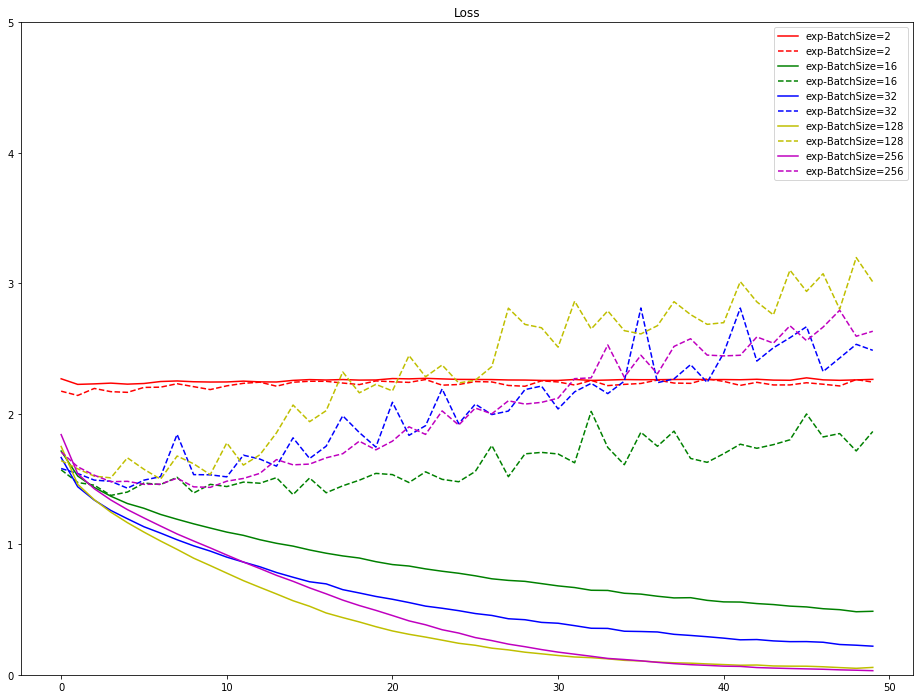

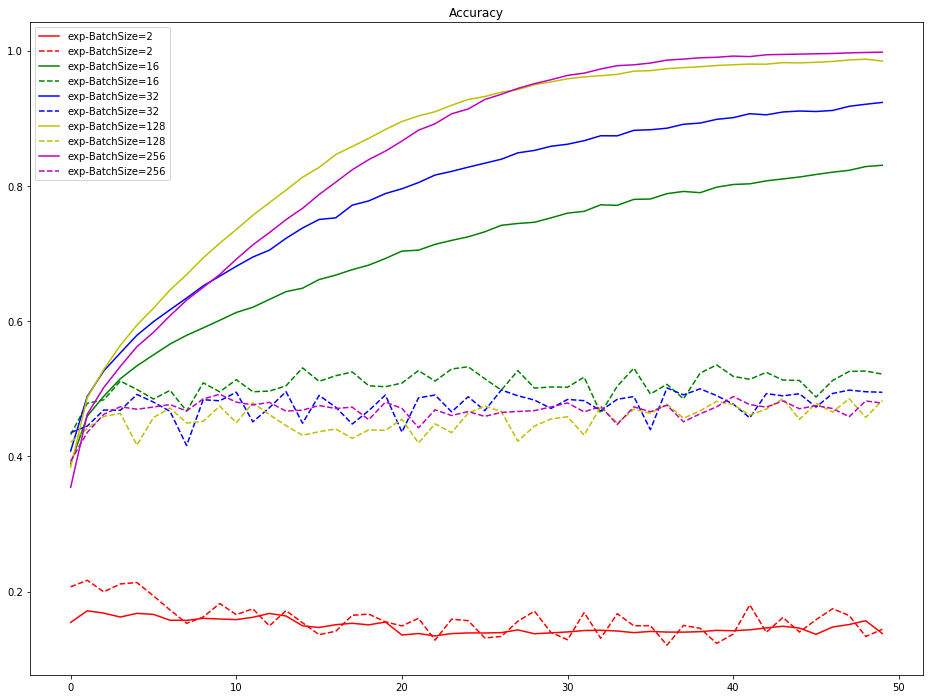

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### BN After Activation

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.ReLU()(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.ReLU()(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print('Experiment with Batch Size = {}'.format(bs))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-BatchSize={}".format(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Batch Size = 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
re_lu_2 (ReLU)               (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)     

50000/50000 [==============================] - 179s 4ms/step - loss: 2.2600 - acc: 0.1489 - val_loss: 3.0782 - val_acc: 0.1482
Epoch 47/50
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2636 - acc: 0.1490 - val_loss: 2.9050 - val_acc: 0.1514
Epoch 48/50
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2534 - acc: 0.1614 - val_loss: 2.8091 - val_acc: 0.1680
Epoch 49/50
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2643 - acc: 0.1453 - val_loss: 2.5481 - val_acc: 0.1868
Epoch 50/50
50000/50000 [==============================] - 180s 4ms/step - loss: 2.2516 - acc: 0.1585 - val_loss: 2.5598 - val_acc: 0.1687
Experiment with Batch Size = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)

50000/50000 [==============================] - 23s 463us/step - loss: 1.1452 - acc: 0.5953 - val_loss: 1.4261 - val_acc: 0.5044
Epoch 42/50
50000/50000 [==============================] - 23s 462us/step - loss: 1.1386 - acc: 0.5949 - val_loss: 1.3730 - val_acc: 0.5219
Epoch 43/50
50000/50000 [==============================] - 23s 464us/step - loss: 1.1425 - acc: 0.5968 - val_loss: 1.3242 - val_acc: 0.5407
Epoch 44/50
50000/50000 [==============================] - 23s 465us/step - loss: 1.1274 - acc: 0.6027 - val_loss: 1.3213 - val_acc: 0.5369
Epoch 45/50
50000/50000 [==============================] - 23s 462us/step - loss: 1.1187 - acc: 0.6055 - val_loss: 1.3401 - val_acc: 0.5369
Epoch 46/50
50000/50000 [==============================] - 23s 463us/step - loss: 1.1164 - acc: 0.6029 - val_loss: 1.3934 - val_acc: 0.5147
Epoch 47/50
50000/50000 [==============================] - 23s 462us/step - loss: 1.1178 - acc: 0.6030 - val_loss: 1.3649 - val_acc: 0.5231
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 12s 238us/step - loss: 0.8949 - acc: 0.6781 - val_loss: 1.5447 - val_acc: 0.5013
Epoch 37/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.8894 - acc: 0.6844 - val_loss: 1.4722 - val_acc: 0.5190
Epoch 38/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.8789 - acc: 0.6856 - val_loss: 1.6936 - val_acc: 0.4662
Epoch 39/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.8728 - acc: 0.6862 - val_loss: 1.5119 - val_acc: 0.5171
Epoch 40/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.8656 - acc: 0.6899 - val_loss: 1.5048 - val_acc: 0.5198
Epoch 41/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.8627 - acc: 0.6924 - val_loss: 1.5829 - val_acc: 0.4993
Epoch 42/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.8512 - acc: 0.6941 - val_loss: 1.5466 - val_acc: 0.4991
Epoch 43/50
50000/50000 [=======

50000/50000 [==============================] - 5s 90us/step - loss: 0.5075 - acc: 0.8251 - val_loss: 2.0094 - val_acc: 0.4523
Epoch 32/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.4978 - acc: 0.8281 - val_loss: 1.9780 - val_acc: 0.4720
Epoch 33/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.4811 - acc: 0.8334 - val_loss: 2.0118 - val_acc: 0.4709
Epoch 34/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.4571 - acc: 0.8436 - val_loss: 2.1083 - val_acc: 0.4646
Epoch 35/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.4363 - acc: 0.8494 - val_loss: 2.2742 - val_acc: 0.4518
Epoch 36/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.4174 - acc: 0.8568 - val_loss: 2.1143 - val_acc: 0.4602
Epoch 37/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.4086 - acc: 0.8590 - val_loss: 2.0573 - val_acc: 0.4741
Epoch 38/50
50000/50000 [=====================

Epoch 27/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.5537 - acc: 0.8156 - val_loss: 1.8847 - val_acc: 0.4606
Epoch 28/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.5260 - acc: 0.8263 - val_loss: 1.7507 - val_acc: 0.4877
Epoch 29/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.5023 - acc: 0.8346 - val_loss: 1.9944 - val_acc: 0.4525
Epoch 30/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.4789 - acc: 0.8443 - val_loss: 1.9766 - val_acc: 0.4620
Epoch 31/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.4639 - acc: 0.8493 - val_loss: 2.0131 - val_acc: 0.4698
Epoch 32/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.4405 - acc: 0.8592 - val_loss: 1.9542 - val_acc: 0.4689
Epoch 33/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.4162 - acc: 0.8669 - val_loss: 1.9963 - val_acc: 0.4720
Epoch 34/50
50000/50000 [=========

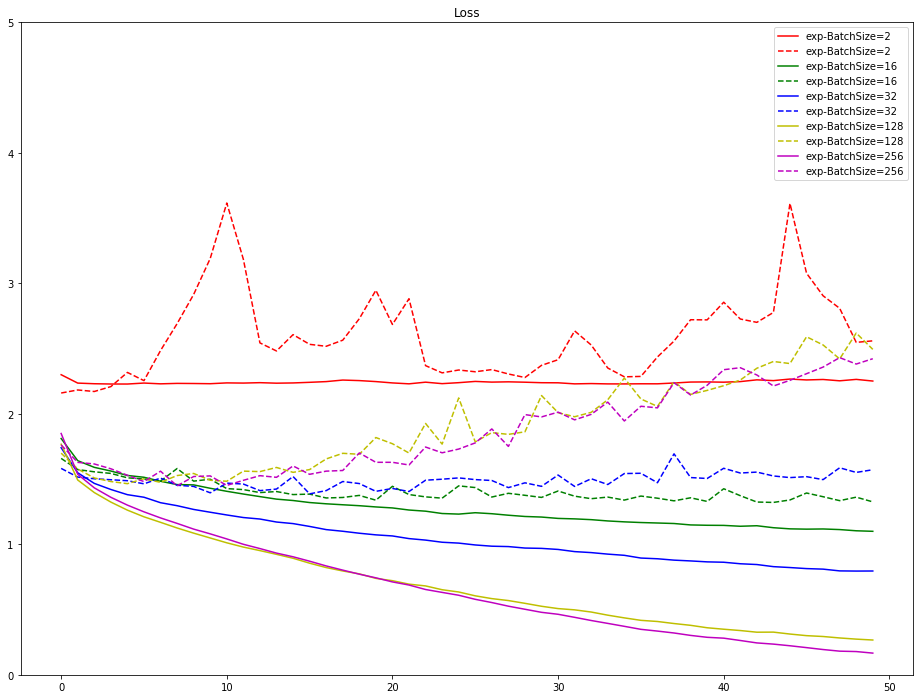

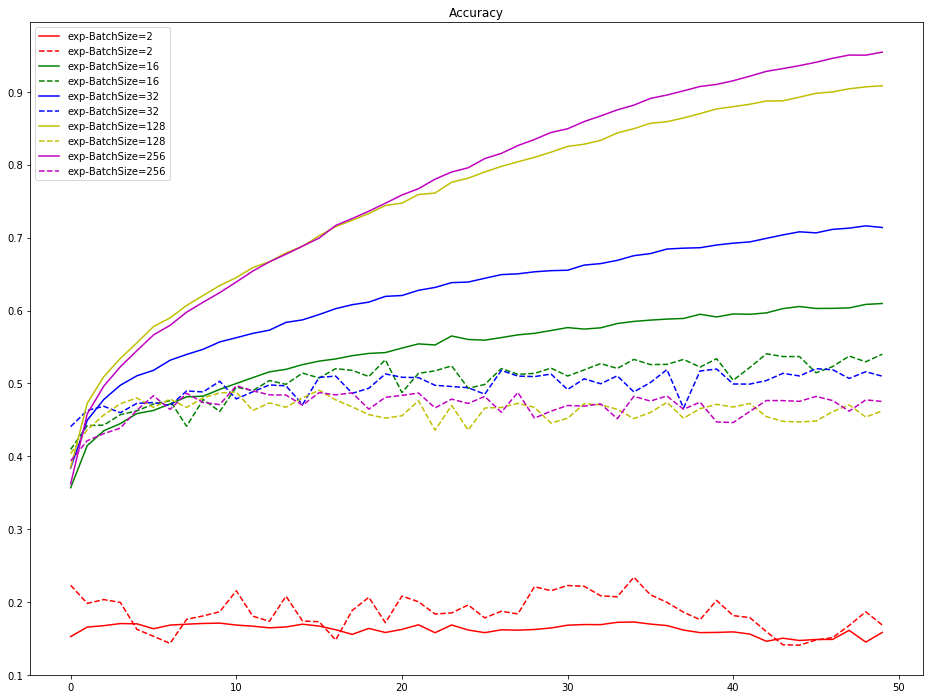

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()